In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''import wget
url = 'https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/hj3vvx5946-1.zip' 
wget.download(url)'''

"import wget\nurl = 'https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/hj3vvx5946-1.zip' \nwget.download(url)"

In [3]:
'''from zipfile import ZipFile
zf = ZipFile('C:/Users/prash/Deep_learning/Vehicle_counting/vehicle_count_ds.zip', 'r')
zf.extractall('C:/Users/prash/Deep_learning/Vehicle_counting')
zf.close()'''

"from zipfile import ZipFile\nzf = ZipFile('C:/Users/prash/Deep_learning/Vehicle_counting/vehicle_count_ds.zip', 'r')\nzf.extractall('C:/Users/prash/Deep_learning/Vehicle_counting')\nzf.close()"

In [4]:
'''import os
source = 'C:/Users/prash/Deep_learning/Vehicle_counting/hj3vvx5946-1'
destination = 'C:/Users/prash/Deep_learning/Vehicle_counting/vehicle_count_ds'
os.rename(source,destination)'''

"import os\nsource = 'C:/Users/prash/Deep_learning/Vehicle_counting/hj3vvx5946-1'\ndestination = 'C:/Users/prash/Deep_learning/Vehicle_counting/vehicle_count_ds'\nos.rename(source,destination)"

In [5]:
Image_size = 256
Batch_size = 32
Channels = 3
Epochs = 150

In [6]:
data = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/prash/Deep_learning/Vehicle_counting/vehicle_count_ds/train',
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size)

Found 3096 files belonging to 48 classes.


In [7]:
classes = data.class_names
classes

['Daiatsu_Core',
 'Daiatsu_Hijet',
 'Daiatsu_Mira',
 'FAW_V2',
 'FAW_XPV',
 'Honda_BRV',
 'Honda_City_aspire',
 'Honda_Grace',
 'Honda_Vezell',
 'Honda_city_1994',
 'Honda_city_2000',
 'Honda_civic_1994',
 'Honda_civic_2005',
 'Honda_civic_2007',
 'Honda_civic_2015',
 'Honda_civic_2018',
 'KIA_Sportage',
 'Suzuki_Every',
 'Suzuki_Mehran',
 'Suzuki_alto_2007',
 'Suzuki_alto_2019',
 'Suzuki_alto_japan_2010',
 'Suzuki_carry',
 'Suzuki_cultus_2018',
 'Suzuki_cultus_2019',
 'Suzuki_highroof',
 'Suzuki_kyber',
 'Suzuki_liana',
 'Suzuki_margala',
 'Suzuki_swift',
 'Suzuki_wagonR_2015',
 'Toyota HIACE 2000',
 'Toyota_Aqua',
 'Toyota_Hiace_2012',
 'Toyota_Landcruser',
 'Toyota_Passo',
 'Toyota_Prado',
 'Toyota_Vigo',
 'Toyota_Vitz',
 'Toyota_Vitz_2010',
 'Toyota_axio',
 'Toyota_corolla_2000',
 'Toyota_corolla_2007',
 'Toyota_corolla_2011',
 'Toyota_corolla_2016',
 'Toyota_fortuner',
 'Toyota_pirus',
 'Toyota_premio']

In [8]:
len(data)

97

In [9]:
for image_batch, label_batch in data.take(1) :
    print ( image_batch.shape)
    print (label_batch.numpy( ))

(32, 256, 256, 3)
[43 25 43 23 23 31 18 42 24  6 18 31 19 32 32 10  6 15  7 44 20 38 30 38
  0  8 18 23 14  0  8 45]


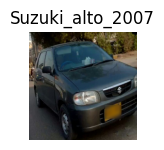

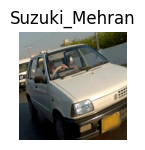

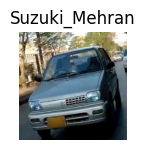

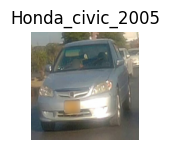

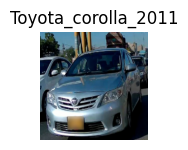

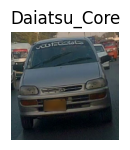

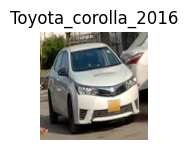

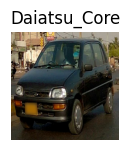

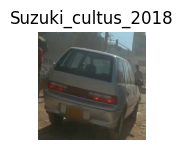

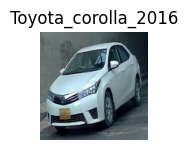

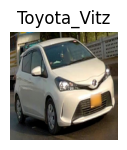

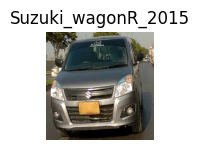

In [10]:
for image_batch, label_batch in data.take(1):
    for x in range(12):
        ax =plt.subplot(3,4,x+1)
        plt.imshow(image_batch[x].numpy().astype('uint8'))
        plt.title(classes[label_batch[x]])
        plt.axis('off')
        plt.show()

In [11]:
def get_dataset_partitions_tf (dataset,train_split=0.9,val_split=0.1,shuffle = True,shuffle_size = 10000):
    dataset_size  = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)

    train_size= int(train_split * dataset_size)
    validation_size= int(val_split * dataset_size)

    train_ds = dataset.take(train_size)

    validation_ds= dataset.skip(train_size) .take(validation_size)

     

    return train_ds, validation_ds
    

In [12]:
train_ds,validation_ds = get_dataset_partitions_tf(data)

In [13]:
len(train_ds)

87

In [14]:
len(validation_ds)

9

In [15]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds= validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
num_classes = 48
input_shape =(Batch_size,Image_size,Image_size,Channels)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  
  #data_augmentation,
  
  tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape =(Batch_size,Image_size,Image_size,Channels)),
  tf.keras.layers.MaxPooling2D(pool_size=3,strides=3),
  
  
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=3,strides=3),
  
  tf.keras.layers.Dropout(rate=0.3),
  
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=3,strides=3),
  
  tf.keras.layers.Dropout(rate=0.3),
  
  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(64, activation='relu'),
  
  tf.keras.layers.Dense(num_classes,activation='softmax')
])


model.build(input_shape)

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 84, 84, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 82, 82, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 27, 27, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (32, 27, 27, 32)          0

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [23]:
hist = model.fit(train_ds, epochs=Epochs,batch_size = Batch_size,validation_data=validation_ds, callbacks=[callbacks])

Epoch 1/150
87/87 [==============================] - 23s 99ms/step - loss: 3.7274 - accuracy: 0.0760 - val_loss: 3.6168 - val_accuracy: 0.0972
Epoch 2/150
87/87 [==============================] - 19s 221ms/step - loss: 3.6128 - accuracy: 0.0854 - val_loss: 3.5182 - val_accuracy: 0.0972
Epoch 3/150
87/87 [==============================] - 19s 223ms/step - loss: 3.5885 - accuracy: 0.0857 - val_loss: 3.5015 - val_accuracy: 0.0903
Epoch 4/150
87/87 [==============================] - 19s 221ms/step - loss: 3.5394 - accuracy: 0.0872 - val_loss: 3.4369 - val_accuracy: 0.0903
Epoch 5/150
87/87 [==============================] - 19s 219ms/step - loss: 3.4909 - accuracy: 0.0904 - val_loss: 3.3860 - val_accuracy: 0.1007
Epoch 6/150
87/87 [==============================] - 19s 218ms/step - loss: 3.4465 - accuracy: 0.1052 - val_loss: 3.2987 - val_accuracy: 0.1215
Epoch 7/150
87/87 [==============================] - 19s 217ms/step - loss: 3.3670 - accuracy: 0.1279 - val_loss: 3.1780 - val_accuracy: 

In [24]:
accuracy = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

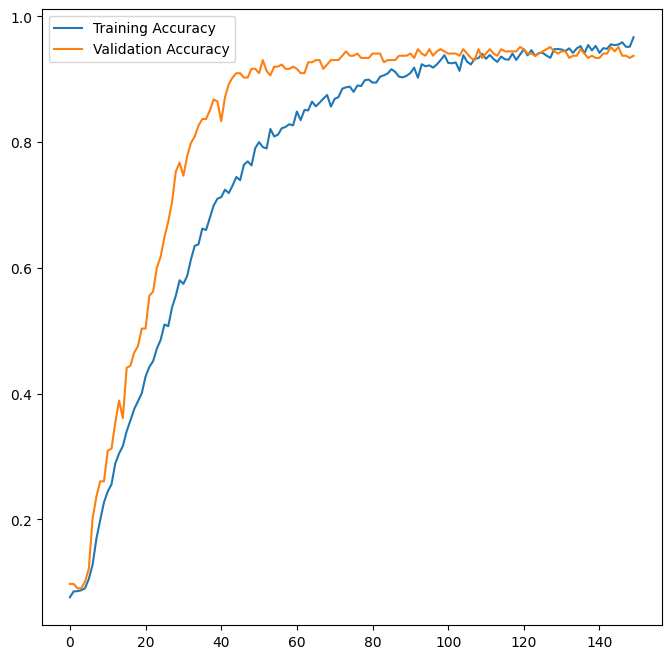

In [25]:
plt.figure(figsize=(8,8))
plt.plot(accuracy,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.legend(loc="upper left")
plt.show()



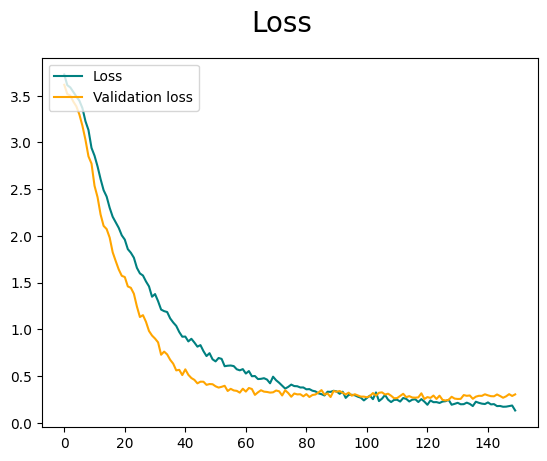

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='Loss')
plt.plot(hist.history['val_loss'], color='orange', label='Validation loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [27]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/prash/Deep_learning/Vehicle_counting/vehicle_count_ds/test',
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size)

Found 751 files belonging to 48 classes.


In [28]:
scores = model.evaluate(test_ds)

24/24 [==============================] - 1s 34ms/step - loss: 2.1661 - accuracy: 0.5699


first image to predict
actual label:  Honda_city_1994
1/1 [==============================] - 0s 183ms/step
predicted label:  Toyota_corolla_2000


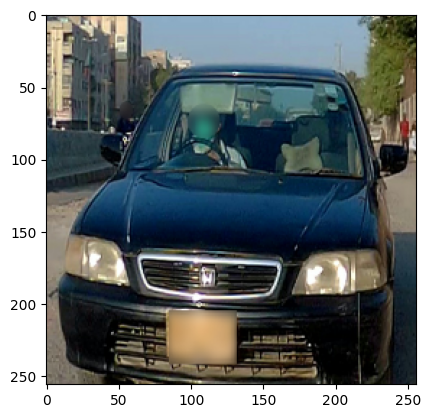

In [29]:
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label: ',classes[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('predicted label: ',classes[np.argmax(batch_prediction[0])])
    

In [30]:
def predict(model, img) :
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0 ) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class= classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class,confidence


1/1 [==============================] - 0s 17ms/step


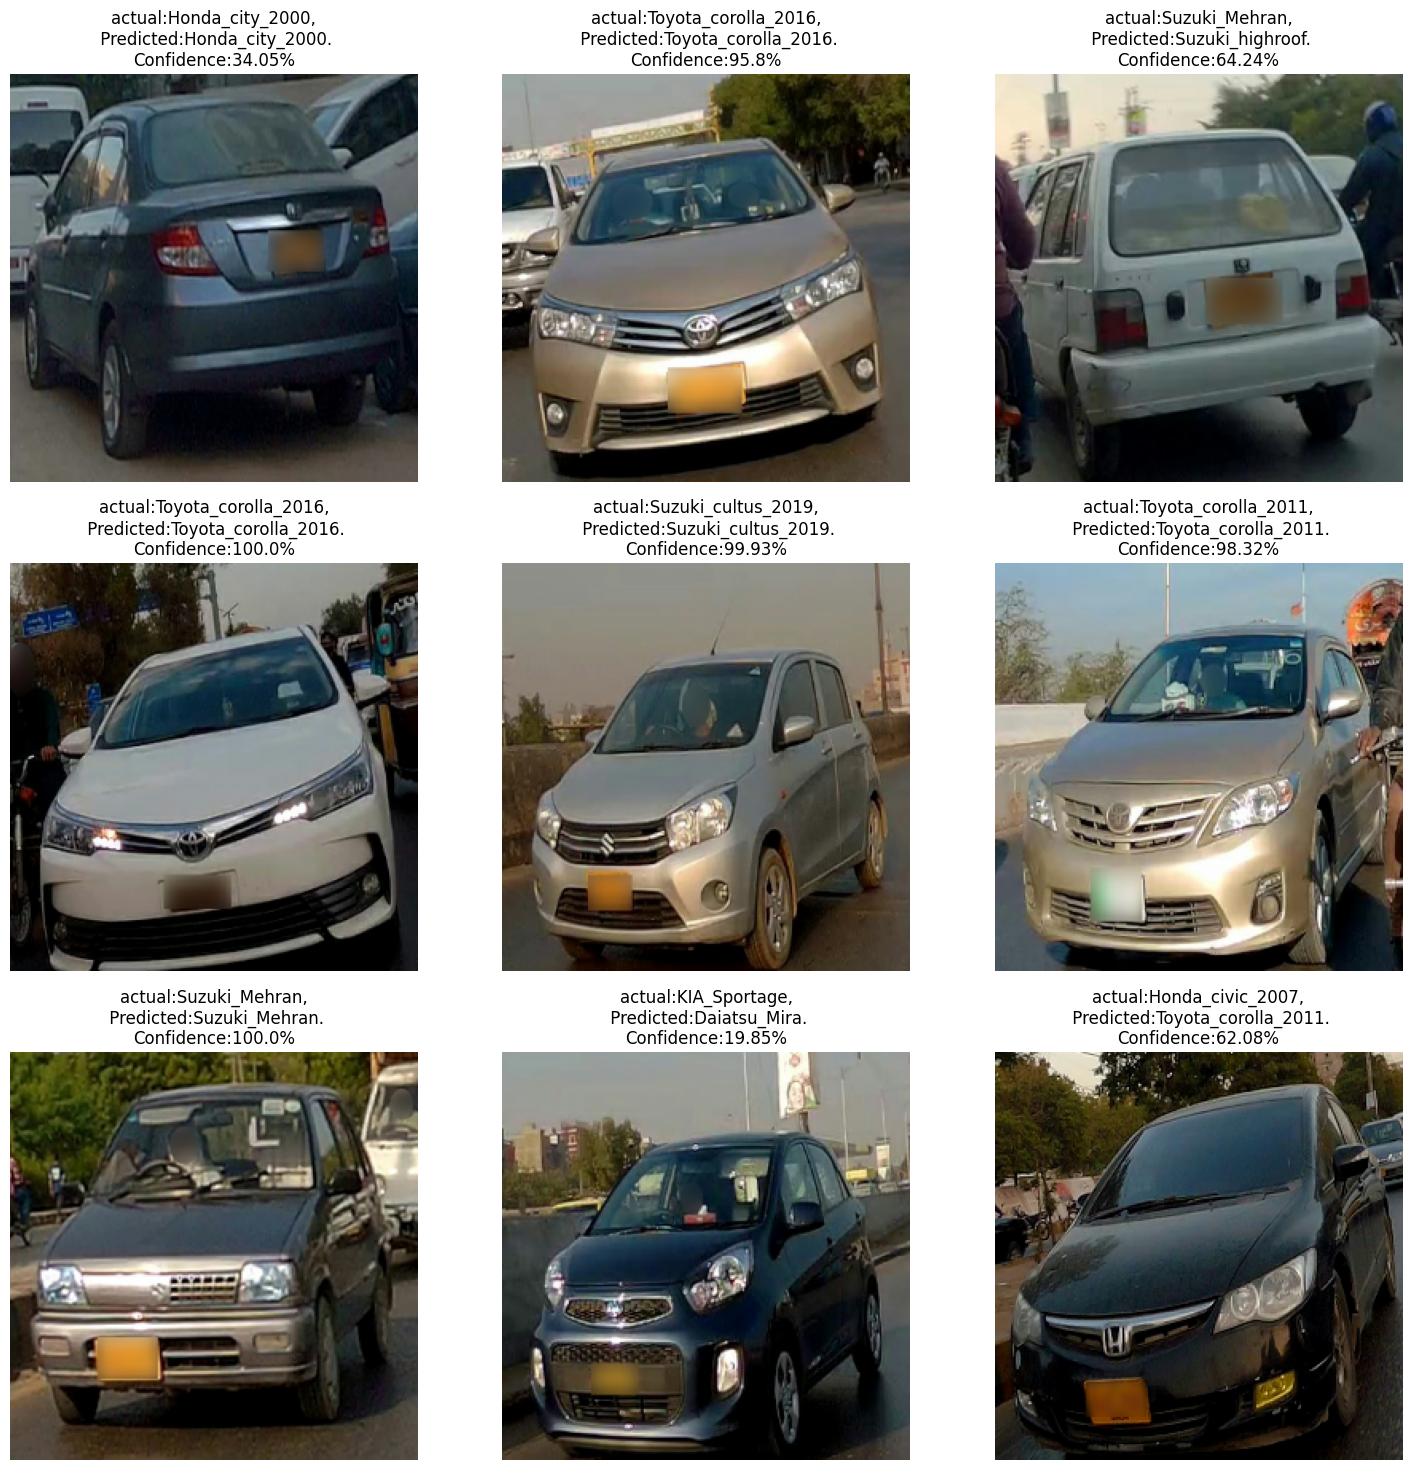

In [31]:
plt.figure(figsize=(18,18))

for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f'actual:{actual_class},\n Predicted:{predicted_class}.\nConfidence:{confidence}%')
        
        plt.axis('off')